# Data analysis of customer data in an insurance company

### Attribute Information

- **age:** age of primary beneficiary.
- **sex:** insurance contractor gender, female, male.
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.
- **smoker:** Smoking. 
- **children:** Number of children covered by health insurance / Number of dependents.
- **region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest,
- **charges:** Individual medical costs billed by health insurance.

In [1]:
# importing all the required packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set

<function seaborn.rcmod.set>

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.isnull().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Following are the derived information based on 5 point summary

* Looking at the age column, data looks representative of the true age distribution of the adult population.
* Very few people have less than 2 chldren. 75% customers have 2 or less children.
* Mean and Median of bmi is very identical which would possibly describe normal distribution.
* The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of


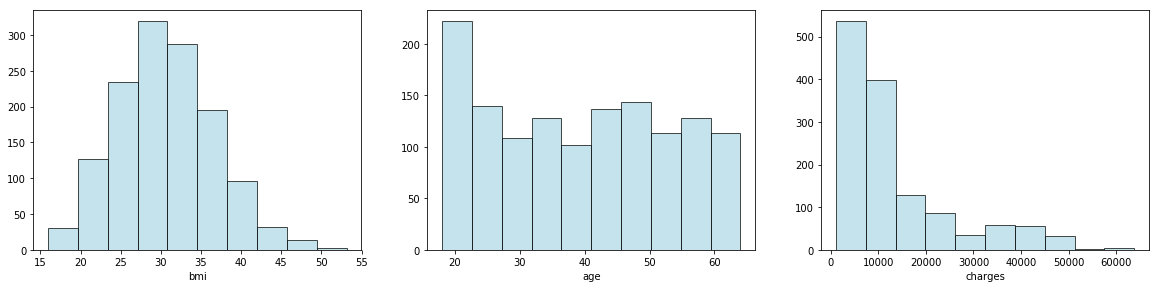

In [8]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df['bmi'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')




plt.show()

## Inferences based on visual evidences:

* bmi looks normally distributed.
* age is apparently uniformly distributed.
* charges is right skewed. 

In [9]:
# using skew() function could find skewness of children which is of no interest.

Skewness=pd.DataFrame({'Skewness':[stats.skew(df.age),stats.skew(df.bmi),stats.skew(df.charges)]},index=['age','bmi','charges'])
Skewness

,Skewness
age,0.055610
bmi,0.283729
charges,1.514180


* distribution of age is apparently uniform ;hence,the skewness is negligible.
* skew of bmi is  very less.
* charges are right skewed.

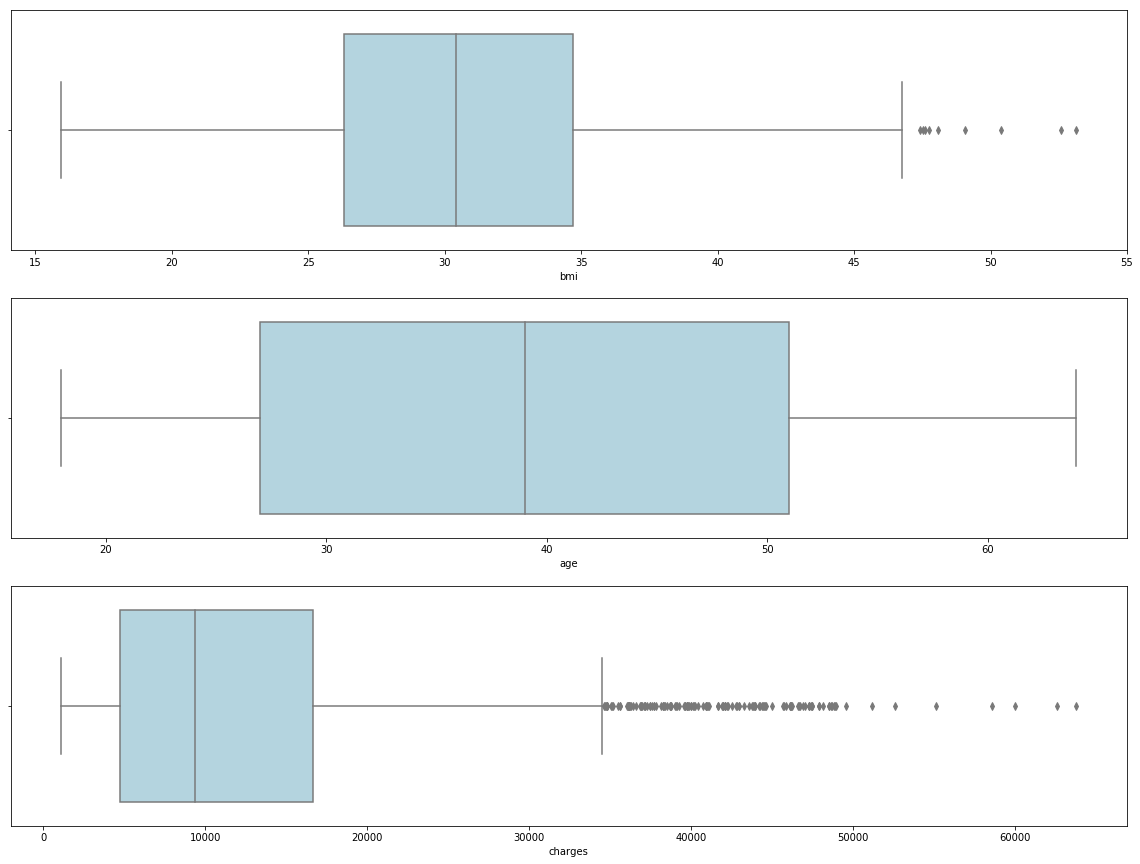

In [10]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

* bmi has few extreme values.
* charges has many extreme values as it is right skewed.

** The extreme values outside whiskers gives the information about the variables which helps in making inferences about the population parameters;Hence, shall not be removed.**

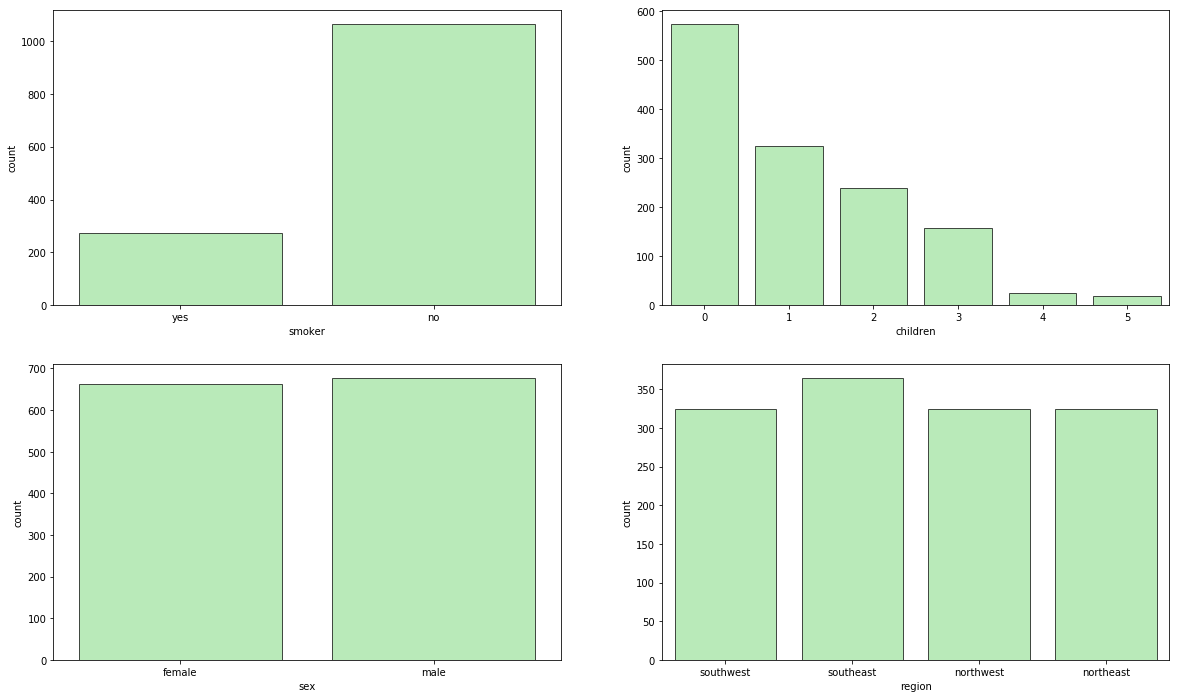

In [11]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.countplot(x=df.smoker,color='lightgreen',edgecolor='black',alpha=0.7)
plt.subplot(4,2,2)
sns.countplot(x=df.children,color='lightgreen',edgecolor='black',alpha=0.7)
plt.subplot(4,2,3)
sns.countplot(x=df.sex,color='lightgreen',edgecolor='black',alpha=0.7)
plt.subplot(4,2,4)
sns.countplot(x=df.region,color='lightgreen',edgecolor='black',alpha=0.7)


plt.show()

## Inference based on visual evidence

* Number of non-smokers is significantly more than that of smokers.
* Most customer are having children less than and equal to 2.
* The concentration of male and female customers are of almost same amount.
* The concentration of customers across regions are approximately same.
 

## 1] Do charges of people who smoke differ significantly from the people who don't?

In [12]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

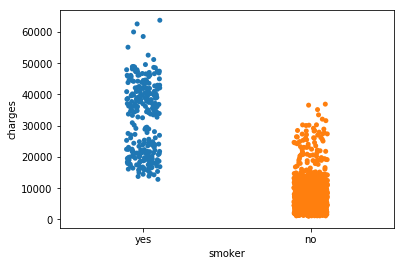

In [13]:
sns.stripplot(df['smoker'],df['charges'],jitter=True)
plt.show()

In [14]:
x=df[df['smoker']=='yes'].charges #yields charges for all smokers
y=df[df['smoker']=='no'].charges #yields charges for all non-smokers 
print(x.mean())
print(y.mean())

32050.23183153285
8434.268297856199


** We have two obtained two sample, one which is list of charges of all smokers and other the list of charges of all non_smokers.**

* We conduct a hypothesis testing to check whether a charges of people who smoke differ significantly from the people who don't.

* Calculates the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values. This test assumes that the
populations have identical variances by default


In [15]:
Ho="The charges of people who smoke and don't smoke are same " # null hypothesis
Ha="The charges of people who smoke and don't smoke are not same" # alternate hypothesis


t, p_value  = stats.ttest_ind(x,y)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

The charges of people who smoke and don't smoke are not same as the p_value (8.271435842177219e-283) < 0.05


**Conclusion:** There is sufficient evidence to conclude that the charges of people who smoke and don't smoke are not same.

## 2] Does bmi of males differ significantly from that of females?

In [16]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

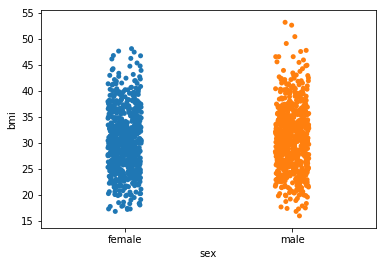

In [17]:
sns.stripplot(y=df.bmi,x=df.sex,jitter=True)
plt.show()

* Based on the above plot, bmi of male looks higher than that of female. 

In [18]:
b_m=df[df.sex=='male'].bmi # bmi values of all male customers
b_f=df[df.sex== 'female'].bmi # bmi values of all female customers

In [19]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis


t, p_value  = stats.ttest_ind(b_m,b_f)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'the p_value ({p_value}) > 0.05')

the p_value (0.08997637178984932) > 0.05


**Conclusion:** There is no sufficient evidence to conclude that Gender has an effect on bmi.

## 3] Is the proportion of smokers significantly different in different genders?

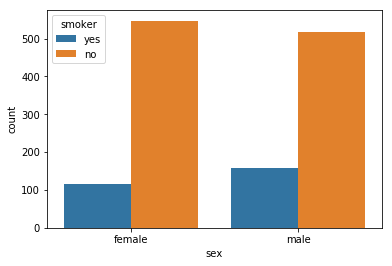

In [20]:
sns.countplot(x=df.sex,hue=df.smoker)
plt.show()

**The above question can be analysed by two methods** :

- Test for proportions.
- Chi-square test.


In [21]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

** Using Test for Proportions** 
- Test for proportions based on normal (z) test.

In [22]:
d_m=df[df.sex=='male'].smoker.value_counts()[1] # Number of male smokers
d_f=df[df.sex=='female'].smoker.value_counts()[1] # Number of female smokers

In [23]:
m=df.sex.value_counts()[0] # Number of males
f=df.sex.value_counts()[1] # Number of females

In [24]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis


In [25]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([d_m, d_f] , [m,f])

if pval < 0.05:
    print(f'{Ha} as p-value of {round(pval,4)} < 0.05.')
else:
    print(f'{Ho} as p-value of {round(pval,4)} > 0.05.')

Gender has an effect on smoking habits as p-value of 0.0053 < 0.05.


**Conclusion:** There is sufficient evidence to conclude that the proportions of male smokers is significantly different then that of female smokers.

**Using Chi-Square Test**
- Chi-square test of independence of variables in a contingency table.This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table.

In [26]:
crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


**Conclusion:** There is sufficient evidence to conclude that the proportions of male smokers is significantly different then that of female smokers.

## To check if there is region has effect on smoking habits

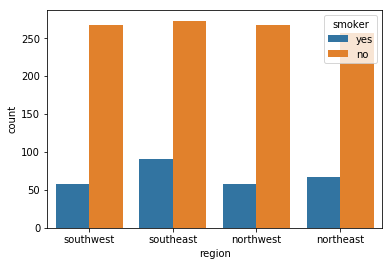

In [27]:
sns.countplot(x=df.region,hue=df.smoker)
plt.show()

In [28]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['smoker'], df['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f' the p_value ({p_value.round(3)}) > 0.05')
crosstab

 the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


**Conclusion:**There is no suuficient evidence to conclude that the region has an effect on smoking habits.

## Is the distribution of bmi across women with no children, one child and two children, the same ?

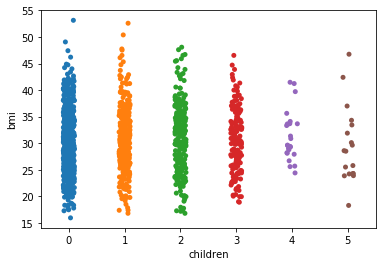

In [29]:
sns.stripplot(df['children'],df['bmi'],jitter=True)
plt.show()

** We use Analysis of variance aka ANOVA(one way). **

- The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.  The test is applied to samples from two or more groups, possibly with differing sizes.

In [30]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])
female_df.head()
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'the p_value ({p_value.round(3)}) > 0.05')


the p_value (0.716) > 0.05


**Conclusion:**There is no sufficient evidence to conclude that the no. of children has an effect on bmi.